<a href="https://colab.research.google.com/github/SanketDevmunde/NLP_ASSIGNMENT/blob/main/NLP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.util import ngrams
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt

# Download required resources
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
class NGramModel:
    def __init__(self, n):
        self.n = n  # Define the N-gram size
        self.model = defaultdict(Counter)

    def train(self, text):
        """Trains the model using input text."""
        tokens = nltk.word_tokenize(text.lower())  # Tokenize text
        n_grams = list(ngrams(tokens, self.n, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))

        for gram in n_grams:
            prefix, next_word = tuple(gram[:-1]), gram[-1]
            self.model[prefix][next_word] += 1

    def predict(self, prefix, top_k=3):
        """Predicts the next word based on the input prefix."""
        prefix = tuple(nltk.word_tokenize(prefix.lower())[-(self.n-1):])
        predictions = self.model[prefix]
        return predictions.most_common(top_k)


In [ ]:
# Example Usage
corpus = "The quick brown fox jumps over the lazy dog. The quick brown fox is fast."
n_gram_model = NGramModel(n=3)  # Trigram model
n_gram_model.train(corpus)

In [ ]:
# Test auto-complete
prefix = "The quick brown"
predictions = n_gram_model.predict(prefix)
print(f"Predictions for '{prefix}':", predictions)


Predictions for 'The quick brown': [('fox', 2)]


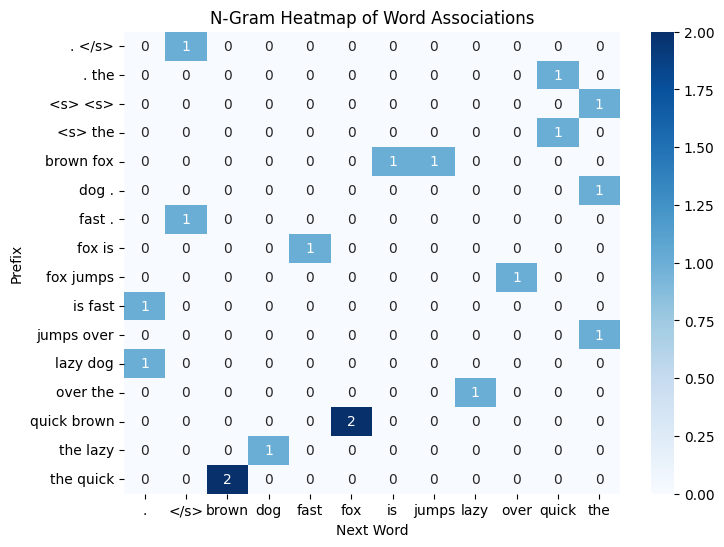

In [ ]:
# Unique Visualization: Multi-feature Heatmap
!pip install seaborn
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt
import pandas as pd

def plot_ngram_heatmap(model):
    """Plots a heatmap of N-gram word associations."""
    data = []

    for prefix, next_words in model.model.items():
        for next_word, count in next_words.items():
            data.append((" ".join(prefix), next_word, count))

    df = pd.DataFrame(data, columns=['Prefix', 'Next Word', 'Count'])
    df_pivot = df.pivot(index='Prefix', columns='Next Word', values='Count').fillna(0)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt='g') # Now sns is defined and can be used
    plt.xlabel("Next Word")
    plt.ylabel("Prefix")
    plt.title("N-Gram Heatmap of Word Associations")
    plt.show()

plot_ngram_heatmap(n_gram_model)